# Orbit Homework

Pranavi Boyalakuntla


In [163]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

### Earth falling into the sun

Here's a question from the web site [Ask an Astronomer](http://curious.astro.cornell.edu/about-us/39-our-solar-system/the-earth/other-catastrophes/57-how-long-would-it-take-the-earth-to-fall-into-the-sun-intermediate):

"If the Earth suddenly stopped orbiting the Sun, I know eventually it would be pulled in by the Sun's gravity and hit it. How long would it take the Earth to hit the Sun? I imagine it would go slowly at first and then pick up speed."

Here's a solution.

In [164]:
# Here are the units we'll need

s = UNITS.second
N = UNITS.newton
kg = UNITS.kilogram
m = UNITS.meter

<Unit('meter')>

In [165]:
# And an inition condition (with everything in SI units)

x_0 = 147e9 * m
y_0 = 0 * m
vx_0 = 0 * m/s
vy_0 = -20000 * m/s

init = State(x=x_0,
            y=y_0,
            vx=vx_0,
            vy=vy_0)

,values
x,147000000000.0 meter
y,0 meter
vx,0.0 meter / second
vy,-20000.0 meter / second


In [166]:
# Making a system object

r_earth = 6.371e6 * m
r_sun = 695.508e6 * m
G = 6.674e-11 * ((N*m**2)/(kg**2))
m_sun = 1.989e30 * kg
m_earth = 5.972e24 * kg
t_0 = 0 * s
t_end = 3.154e+7 * s

system = System(init=init,
                G=G,
                m_sun=m_sun,
                r_final=r_sun + r_earth,
                m_earth=m_earth,
                t_0=t_0,
                t_end=t_end)

,values
init,x 147000000000.0 meter y ...
G,6.674e-11 meter ** 2 * newton / kilogram ** 2
m_sun,1.989e+30 kilogram
r_final,701879000.0 meter
m_earth,5.972e+24 kilogram
t_0,0 second
t_end,31540000.0 second


In [167]:
# Here's a function that computes the force of gravity

def universal_gravitation(state, system):
    """Computes gravitational force.
    
    state: State object with distance r
    system: System object with m1, m2, and G
    """
    x, y, vx, vy = state
    unpack(system)
    r = Vector(x,y)
    force = (G * m_earth * m_sun) / r.mag**2
    direction = -r.hat()
    force = direction * force
    return force

In [168]:
universal_gravitation(init, system)

<Quantity([-3.6686486e+22 -0.0000000e+00], 'newton')>

In [169]:
# The slope function

def slope_func(state, t, system):
    """Compute derivatives of the state.
    
    state: position, velocity
    t: time
    system: System object containing `g`
    
    returns: derivatives of y and v
    """
    x, y, vx, vy = state
    unpack(system)    

    force = universal_gravitation(state, system)
    v = Vector(vx,vy)
    r = Vector (x,y)
    dxdt = vx
    dydt = vy
    a = force/m_earth
    
    return dxdt, dydt, a.x, a.y

In [170]:
# Always test the slope function!

slope_func(init, 0, system)

(<Quantity(0.0, 'meter / second')>,
 <Quantity(-20000.0, 'meter / second')>,
 <Quantity(-0.006143082049146189, 'newton / kilogram')>,
 <Quantity(-0.0, 'newton / kilogram')>)

In [171]:
# Here's an event function that stops the simulation
# before the collision

def event_func(state, t, system):
    x,y,vx,vy = state
    r = Vector(x,y)
    return r.mag - system.r_final

In [172]:
# Always test the event function!

event_func(init, 0, system)

<Quantity(146298121000.0, 'meter')>

In [173]:
# Finally we can run the simulation

results, details = run_ode_solver(system, slope_func, events=event_func)
details

,values
sol,None
t_events,[[]]
nfev,284
njev,0
nlu,0
status,0
message,The solver successfully reached the end of the...
success,True


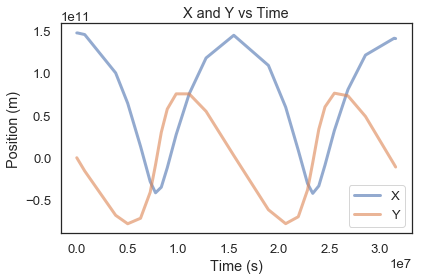

In [174]:
plot(results.x, label = 'X')
plot(results.y, label = 'Y')

decorate(title = 'X and Y vs Time',
        xlabel = 'Time (s)',
        ylabel = "Position (m)")

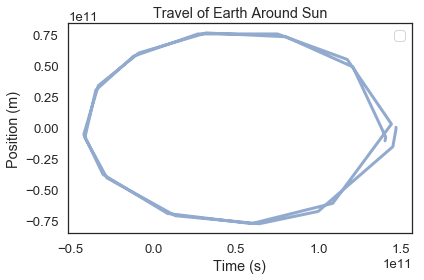

In [175]:
plot(results.x,results.y)
decorate(title = 'Travel of Earth Around Sun',
        xlabel = 'Time (s)',
        ylabel = "Position (m)")

In [176]:
t_0 = 0 * s
t_final = 3.154e+7 * s
tspan = linspace(t_0, t_final, 201)
results,details = run_ode_solver(system, slope_func, t_eval = tspan, method = 'RK23')

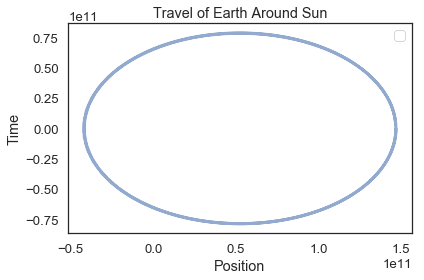

In [177]:
plot(results.x,results.y)
decorate(title = 'Travel of Earth Around Sun',
        xlabel = 'Position',
        ylabel = 'Time')